# Daily Portfolio Value
- Start_val = 1000,000
- Start_date = 2009-1-1
- End_date = 2011-12-31
- Symbols = ['SPY','IBM', 'GOOG', 'GLD']
- Allocs = [0.4, 0.4, 0.1, 0.1]

# Portfolio statistics
- daily_rets = daily_rets[1:] # remove the first element (where return = 0)
- cum_ret = (port_val[-1] / port_val[0]) - 1
- avg_daily_ret = daily_rets.mean()
- std_daily_ret = daily_rets.std()
- sharpe_ratio

# Sharpe ratio
- Risk adjusted return
- All else being equal : lower risk is better | higher return is better
- SR also considers risk free rate of return
- S = E[R_p - R_f] / STD[R_p - R_f] (ex-ante, forward-looking)
- S = mean(daily_rets - daily_rf) / std(daily_rets - daily_rf) (using historical data)
- What is R_f? LIBOR | 3mo T-Bill | 0%
- Daily_rf? power(1+r, -252) - 1

- (summary) S = mean(daily_rets - daily_rf) / std(daily_rets) (adding constant to std can be removed)


### SR can vary widely depending on how frequently you sample
- SR is an annual measure
- SR_annualized = K * SR
- K = sqrt(#samples per year)
  - daily K = sqrt(252) | weekly K = sqrt(52) | monthly K = sqrt(12) 

### If we are using 'daily' data,
### SR = sqrt(252) * mean(daily_rests - daily_rf) / std(daily_rets)

# Optimizer
- Find 'minimum values' of functions
- Build parameterized models based on data
- Refine allocations to stocks in portfolios

## How to use an optimizer
- Provide a function to minimize
- Provide an initial guess
- Call the optimizer

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

X=[4.], Y=[6.75]
X=[4.00000001], Y=[6.75000007]
X=[-1.], Y=[6.75]
X=[1.5], Y=[0.5]
X=[1.50000001], Y=[0.5]
Optimization terminated successfully    (Exit mode 0)
            Current function value: [0.5]
            Iterations: 2
            Function evaluations: 5
            Gradient evaluations: 2
Minima found at:
X=[1.5], Y=[0.5]
X=[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], Y=[1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


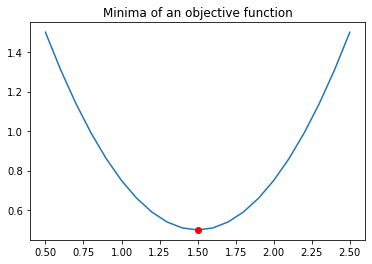

In [9]:
#---------- Calling Optimizer Example --------------------

def f(X):
  """Given a scalar X, return some value (a real number)."""
  Y = (X - 1.5)**2 + 0.5
  print("X={}, Y={}".format(X, Y))
  return Y


def test_run():
  Xguess = 4.0
  min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp':True})
  print("Minima found at:")
  print("X={}, Y={}".format(min_result.x, min_result.fun))

  # Plot function values, mark minima
  Xplot = np.linspace(0.5, 2.5, 21)
  Yplot = f(Xplot)
  plt.plot(Xplot, Yplot)
  plt.plot(min_result.x, min_result.fun, 'ro')
  plt.title("Minima of an objective function")
  plt.show()

if __name__ == "__main__":
  test_run()